In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv('./data/events.csv', low_memory=False)
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
events = df['event']
print(events.size == events.count())

True


In [5]:
events_vc = df['event'].value_counts()
events_vc

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [6]:
products_top5 = df['sku'].value_counts().head(5)
products_top5

2830.0     4282
2831.0     3770
2829.0     3709
8443.0     3506
12758.0    2939
Name: sku, dtype: int64

Text(0,0.5,'Frecuencia ')

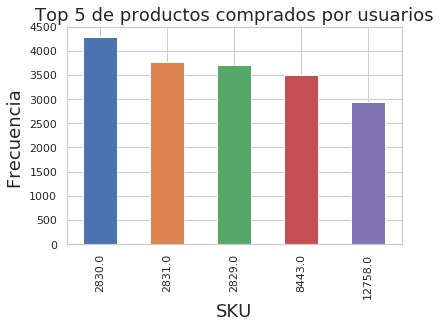

In [7]:
g = products_top5.plot.bar()
g.set_title("Top 5 de productos comprados por usuarios", fontsize=18)
g.set_xlabel("SKU", fontsize=18)
g.set_ylabel("Frecuencia ", fontsize=18)

In [8]:
users = df['person']
users_top10 = users.value_counts().head(10)
users_top10

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

Text(0,0.5,'Frecuencia ')

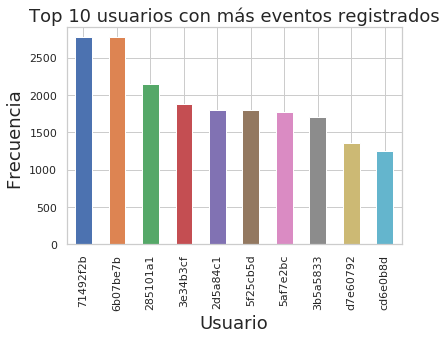

In [9]:
g = users_top10.plot.bar()
g.set_title("Top 10 usuarios con más eventos registrados", fontsize=18)
g.set_xlabel("Usuario", fontsize=18)
g.set_ylabel("Frecuencia ", fontsize=18)

In [10]:
otro  = df[['person','new_vs_returning']]
otro

,person,new_vs_returning
0,0004b0a2,NaN
1,0004b0a2,New
2,0004b0a2,NaN
3,0004b0a2,NaN
4,0006a21a,NaN
5,0006a21a,New
6,0006a21a,NaN
7,0006a21a,NaN
8,000a54b2,NaN
9,000a54b2,New


Veo que cantidad de nuevos usuarios realizaron un evento por primera vez y cuantos volvieron a contabilizar un evento

In [11]:
df['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month

In [13]:
df['month'].value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64

In [25]:

events_short = df.filter(items=['person','event' ,'new_vs_returning','month'])
events_short['Cantidad_de_Eventos'] = 1
events_short['Conversiones'] = events_short['event'] == 'conversion'

events_short

,person,event,new_vs_returning,month,Cantidad_de_Eventos,Conversiones
0,0004b0a2,ad campaign hit,NaN,5,1,False
1,0004b0a2,visited site,New,5,1,False
2,0004b0a2,viewed product,NaN,5,1,False
3,0004b0a2,checkout,NaN,5,1,False
4,0006a21a,viewed product,NaN,5,1,False
5,0006a21a,visited site,New,5,1,False
6,0006a21a,ad campaign hit,NaN,5,1,False
7,0006a21a,checkout,NaN,5,1,False
8,000a54b2,generic listing,NaN,4,1,False
9,000a54b2,visited site,New,4,1,False


Separo la cantidad de usuarios new y returning por mes

In [26]:
grouped = events_short.groupby(['new_vs_returning','month']).agg({'Cantidad_de_Eventos':('sum')})

In [27]:
grouped

Cantidad_de_Eventos
new_vs_returning month                     
New              1                      517
                 2                      499
                 3                     1125
                 4                     1627
                 5                    12604
                 6                    10526
Returning        1                     1618
                 2                     2291
                 3                     6122
                 4                    11023
                 5                    27533
                 6                    11893

# Agrupo por mes cuantas conversiones hubo

In [28]:
grouped = events_short.groupby(['month']).agg({'Conversiones':'sum'})
grouped

,Conversiones
month,
1,63.0
2,74.0
3,265.0
4,316.0
5,351.0
6,103.0


# Quiero ver cuantos eventos necesitó la gente para hacer una conversion

In [88]:
grupo = events_short.groupby(['person']).agg({'Cantidad_de_Eventos':'sum', 'Conversiones':'sum'}) 
#grupo.loc[grupo['Conversion'] == False, :]
#grupo = grupo.groupby(['Cantidad de Eventos']).agg({'Conversiones':'sum'}) 
#grupo['Conversion'].sum()
grupo['Cant de Personas'] = 1
grupo = grupo.groupby(['Cantidad_de_Eventos']).agg({'Conversiones':'sum', 'Cant de Personas':'sum'}) 

grupo = grupo.reset_index()
grupo

,Cantidad_de_Eventos,Conversiones,Cant de Personas
0,1,0.0,471
1,2,55.0,428
2,3,21.0,512
3,4,7.0,3248
4,5,11.0,1514
5,6,6.0,1282
6,7,8.0,1126
7,8,15.0,1178
8,9,2.0,909
9,10,2.0,943


In [95]:
sin_conversiones= grupo[grupo.Conversiones == 0]

sin_conversiones.sort_values(by='Cant de Personas', ascending=False).head()

,Cantidad_de_Eventos,Conversiones,Cant de Personas
0,1,0.0,471
37,38,0.0,157
56,57,0.0,74
61,62,0.0,66
64,65,0.0,44


In [141]:
grupo_max = grupo[grupo.Conversiones > 0]

grupo_max = grupo_max.sort_values(by='Conversiones', ascending=False).head(50)
#La mayor cantidad de conversiones se registra con 2 eventos
grupo_max = grupo_max.reset_index()
grupo_max

,index,Cantidad_de_Eventos,Conversiones,Cant de Personas
0,1,2,55.0,428
1,2,3,21.0,512
2,119,120,15.0,16
3,135,136,15.0,21
4,7,8,15.0,1178
5,458,576,11.0,1
6,306,310,11.0,4
7,16,17,11.0,501
8,241,243,11.0,9
9,501,762,11.0,2


Text(0,0.5,'Conversiones')

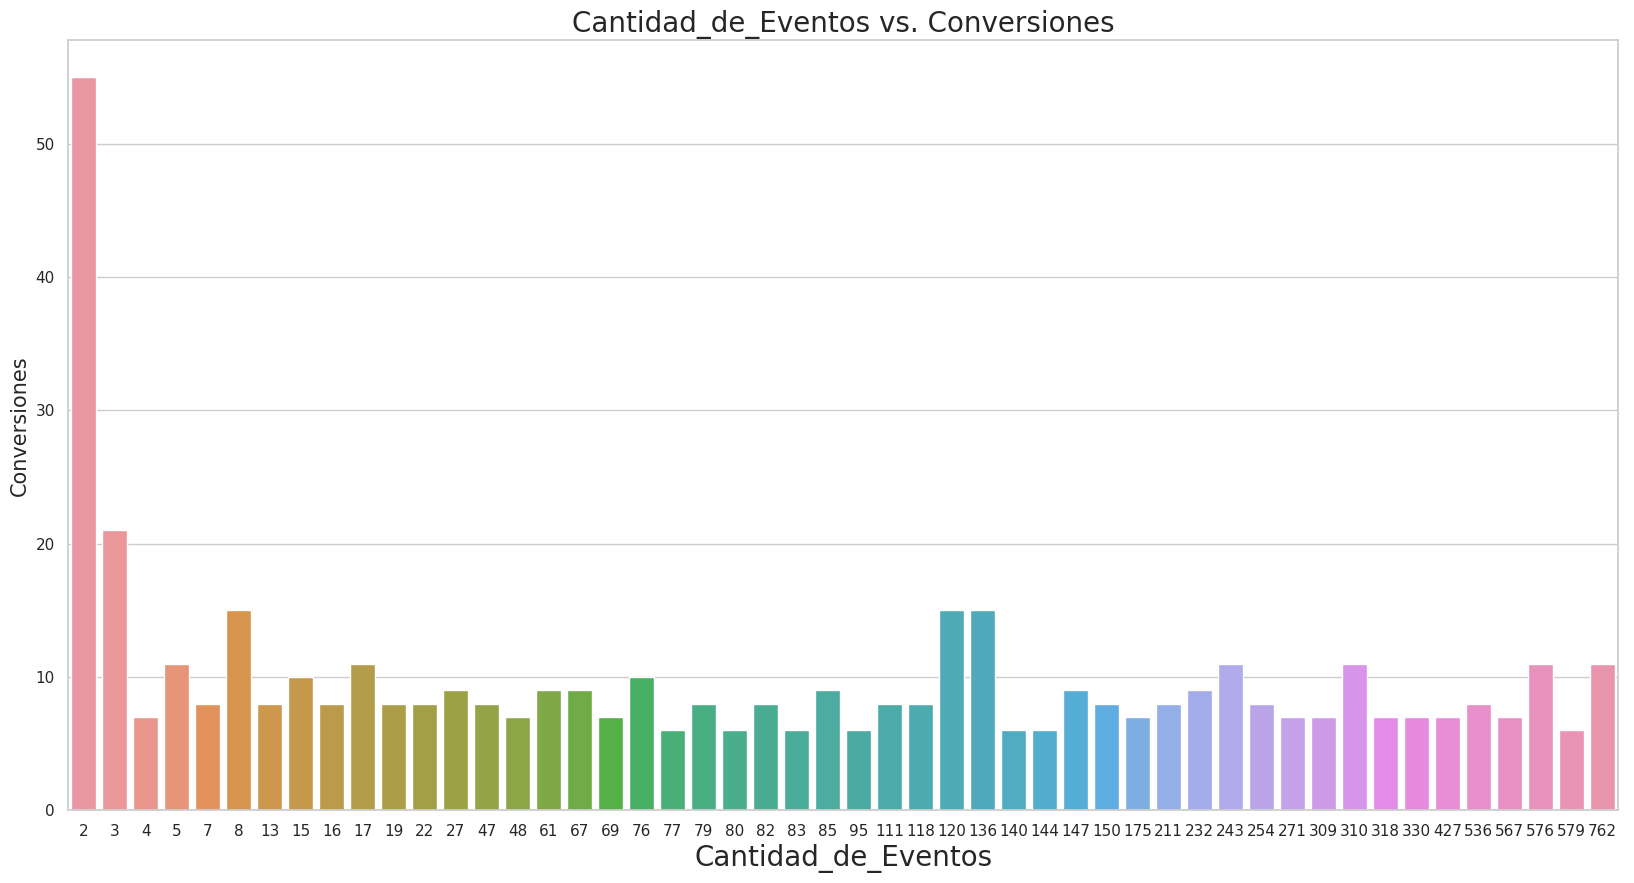

In [142]:
plt.rcParams["axes.labelsize"] = 30
university_per_age_graph = sns.barplot(x=grupo_max['Cantidad_de_Eventos'], y=grupo_max['Conversiones'], orient='v')
university_per_age_graph.set_title("Cantidad_de_Eventos vs. Conversiones", fontsize=20)
university_per_age_graph.set_xlabel("Cantidad_de_Eventos", fontsize=20)
university_per_age_graph.set_ylabel("Conversiones", fontsize=15)

In [143]:
grupo_eventos = grupo_max.sort_values(by='Cant de Personas', ascending=False)
grupo_eventos = grupo_eventos.reset_index()
grupo_eventos = grupo_eventos.head(10)
grupo_eventos
#La mayoria de las personas tienen estos eventos

,level_0,index,Cantidad_de_Eventos,Conversiones,Cant de Personas
0,34,3,4,7.0,3248
1,10,4,5,11.0,1514
2,4,7,8,15.0,1178
3,19,6,7,8.0,1126
4,23,12,13,8.0,698
5,11,14,15,10.0,519
6,1,2,3,21.0,512
7,7,16,17,11.0,501
8,25,15,16,8.0,477
9,0,1,2,55.0,428


Text(0,0.5,'Cant de Personas')

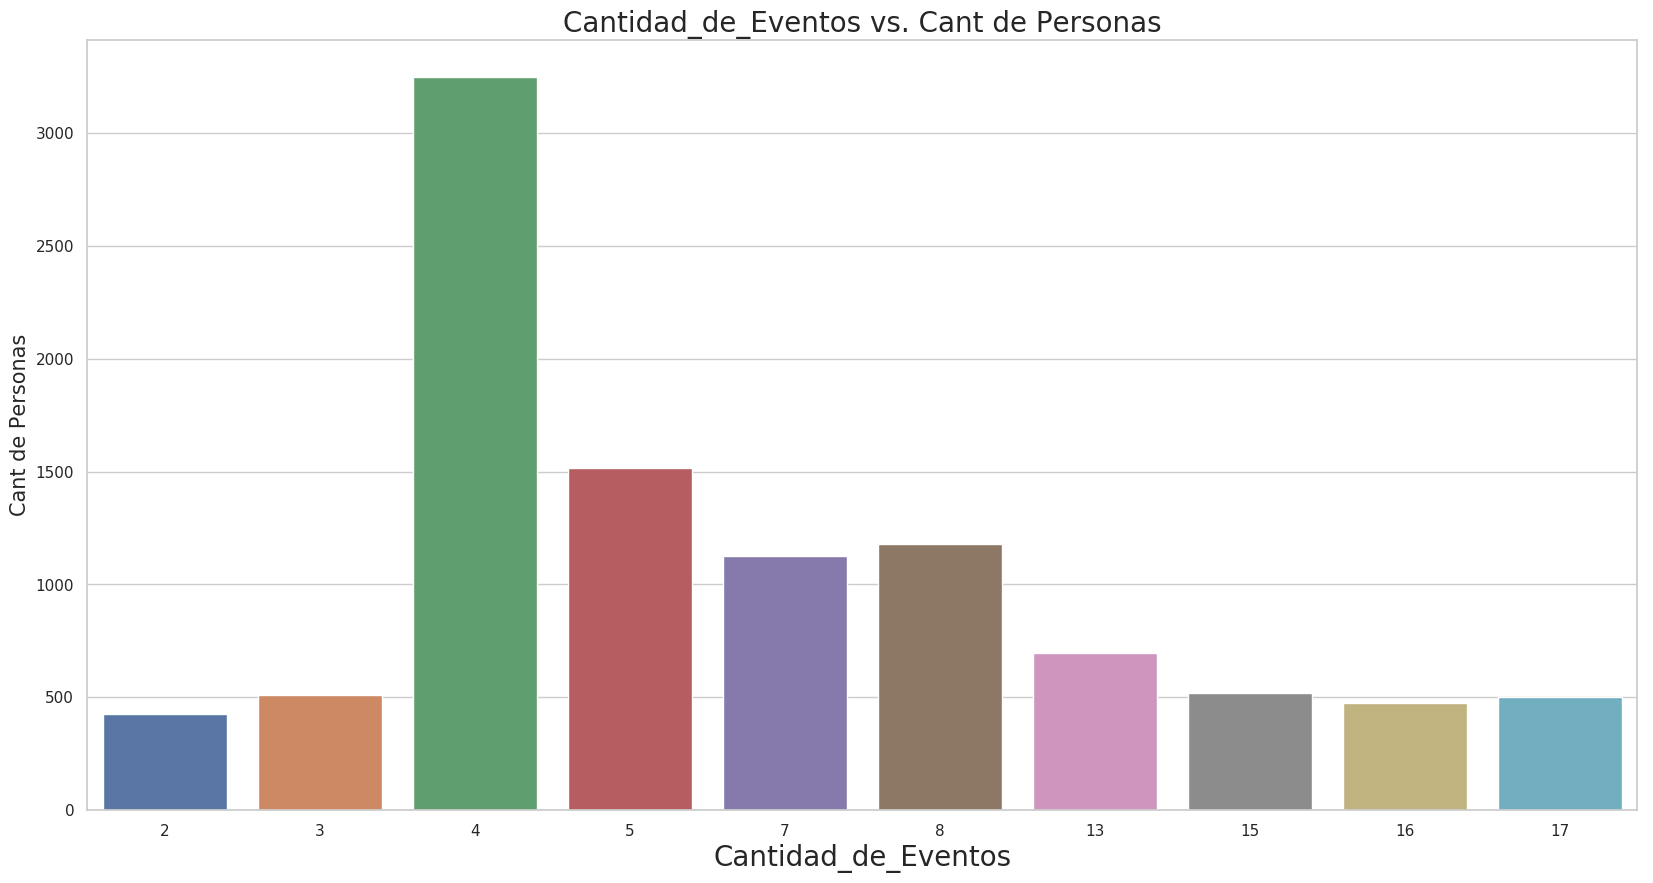

In [140]:
plt.rcParams["axes.labelsize"] = 30
university_per_age_graph = sns.barplot(x=grupo_eventos['Cantidad_de_Eventos'], y=grupo_eventos['Cant de Personas'], orient='v')
university_per_age_graph.set_title("Cantidad_de_Eventos vs. Cant de Personas", fontsize=20)
university_per_age_graph.set_xlabel("Cantidad_de_Eventos", fontsize=20)
university_per_age_graph.set_ylabel("Cant de Personas", fontsize=15)

In [166]:
events_short = df.filter(items=['person','event', 'month'])
events_short = events_short[(events_short.event == 'conversion') | (events_short.event == 'checkout')]
events_short['Conversiones'] = events_short['event'] == 'conversion'
events_short['CheckOut'] = events_short['event'] == 'checkout'

grouped = events_short.groupby(['month']).agg({'Conversiones':'sum', 'CheckOut':'sum'})
grouped = grouped.reset_index()
grouped

,month,Conversiones,CheckOut
0,1,63.0,331.0
1,2,74.0,441.0
2,3,265.0,1386.0
3,4,316.0,1965.0
4,5,351.0,15645.0
5,6,103.0,13967.0


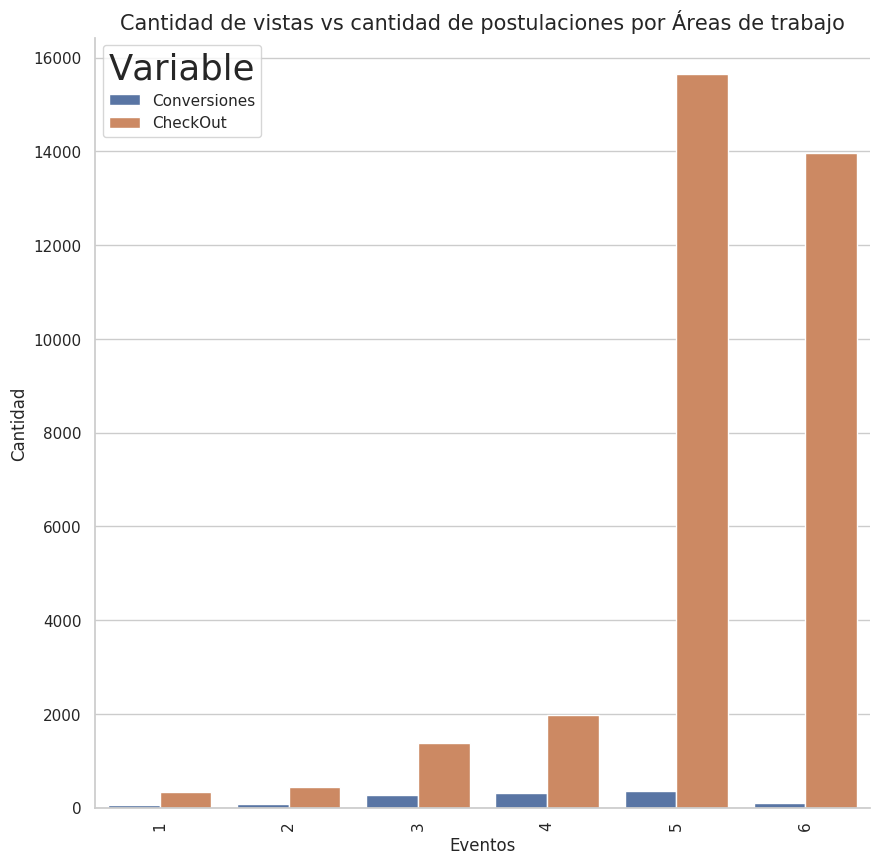

In [165]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = (
    grouped.set_index('month')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)
g = sns.barplot(x='month', y='Value', hue='Variable', data=tidy, ax=ax1, orient='v')
for item in g.get_xticklabels():
    item.set_rotation(90)

g.set_title("Cantidad de vistas vs cantidad de postulaciones por Áreas de trabajo", fontsize=15)
g.set_xlabel("Eventos", fontsize=12)
g.set_ylabel("Cantidad", fontsize=12)

sns.despine(fig)

In [130]:
los_eventos = df.filter(items=['person','event'])
los_eventos['Cantidad_de_Eventos'] = 1
#eventos = los_eventos.groupby(['person']).agg({'Cantidad de Eventos':'sum'}) 
#evento
los_eventos = los_eventos.groupby(['person']).agg({'Cantidad_de_Eventos':'sum'}) 
los_eventos[los_eventos['Cantidad_de_Eventos'] == 2]

,Cantidad_de_Eventos
person,
0275546e,2
02e033b0,2
02fd5563,2
057446d4,2
07353dfc,2
074d5b64,2
09592dc9,2
0b0c064c,2
0b886ea6,2


In [62]:
los_eventos = df.filter(items=['person','event'])
los_eventos[los_eventos['person'] == 'ff8d3872']


,person,event
1008943,ff8d3872,conversion
1008944,ff8d3872,checkout


In [60]:
df[df['person'] == '1146f7ee']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,month
59176,2018-05-18 14:32:12,conversion,1146f7ee,NaN,2940.0,Sony Xperia Z2,Muito Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
59177,2018-05-18 14:40:12,checkout,1146f7ee,NaN,2940.0,Sony Xperia Z2,Muito Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
